In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def seizure_time_parser(onset_times,patient_number,data_set_number):
    temp = str(onset_times[patient_number-1][data_set_number])
    curr_onset_time = []
    while temp.find('/')!=-1:
        curr_onset_time.append(int(temp[0:temp.find('/')]))
        temp=temp[temp.find('/')+1:]
    curr_onset_time.append(int(float(temp)))
    curr_onset_time=np.array(curr_onset_time)
    return curr_onset_time

In [3]:
seizure_file = open('seizure_times.csv','r',newline='')
reader = csv.reader(seizure_file,delimiter=',')
onset_times=[]
for row in reader:
    onset_times.append(row)
onset_times_ordered = []
total_patient = len(onset_times)
event_number = np.zeros(total_patient,dtype=np.int32)
#number of events of (i+1) patient = event_number[i]
for i in range(total_patient):
    event_number[i] = len(onset_times[i])

for p in range(1,total_patient+1):
    temp = []
    for d in range(1,event_number[p-1]):
        temp.append(seizure_time_parser(onset_times,p,d))
    onset_times_ordered.append(temp)

# Input data processing

In [4]:
file_path = '/home/maestoj/medical_analysis/ar/'

In [5]:
def file_name_composer(patient_number,data_set_number):
    file_name = "data_patient_{}_AR{}.csv".format(patient_number,data_set_number)
    return file_path+file_name

In [6]:
print(file_name_composer(1,2))

/home/maestoj/medical_analysis/ar/data_patient_1_AR2.csv


In [26]:
#data_set_number = 9
patient_number = 9
sampling_rate = 200
sec_per_ar = 2
ar_per_sec = 1/sec_per_ar

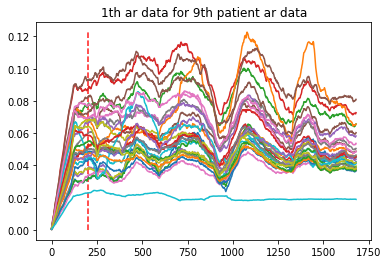

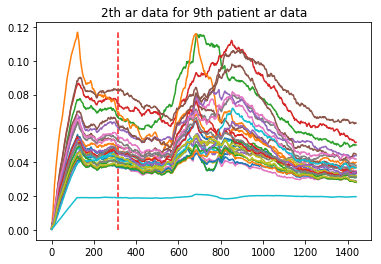

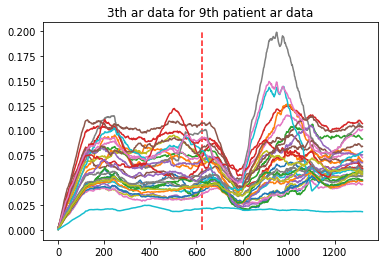

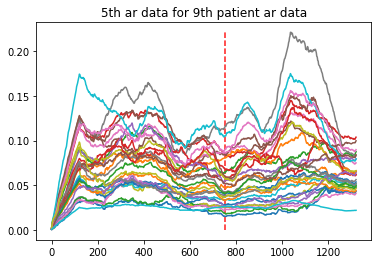

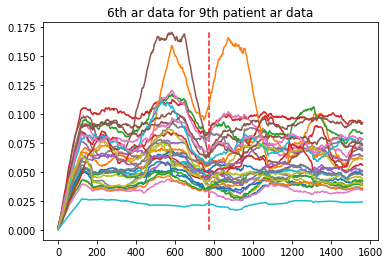

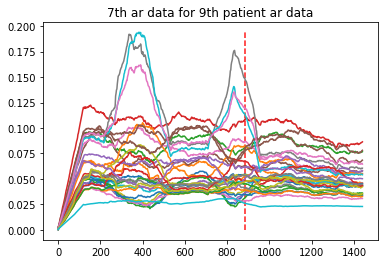

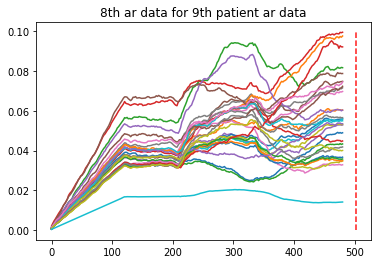

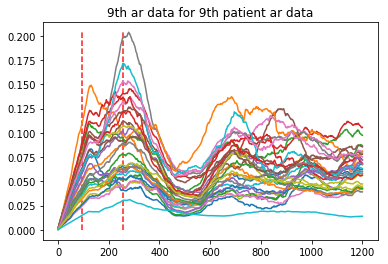

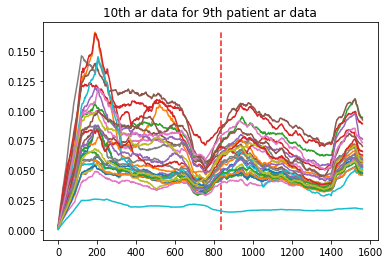

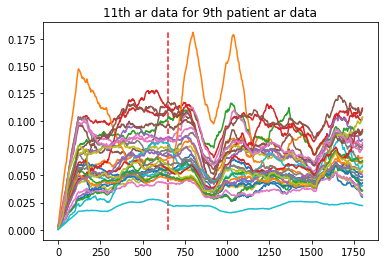

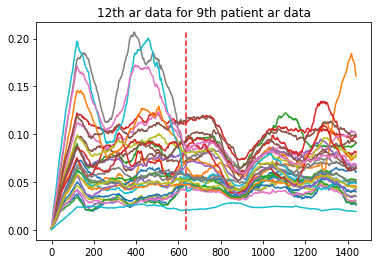

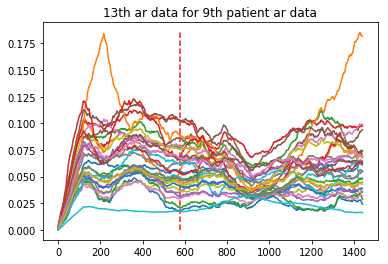

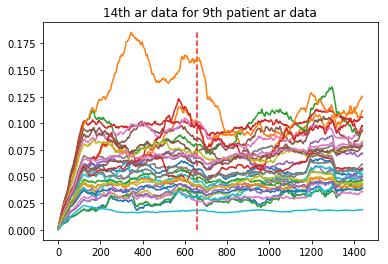

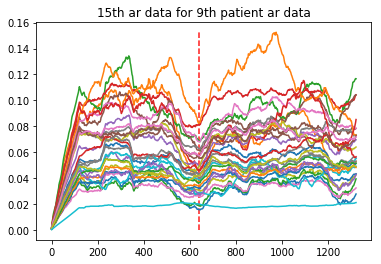

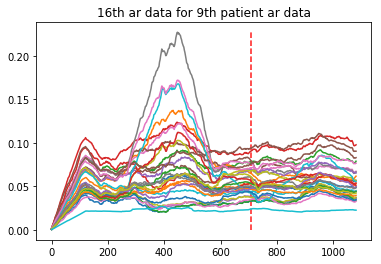

In [28]:
input_data = []
output_data = []
flag = 0;
for d in range(1,event_number[patient_number-1]):
    if d==4:
        continue;
    
    seizure_file = open(file_name_composer(patient_number, d)
                    ,'r',newline='')
    reader = csv.reader(seizure_file,delimiter=',')
    temp=[]
    for row in reader:
        temp.append(row)
    temp = np.array(temp, dtype=np.float32)
    nchannels = temp.shape[0]
    nars = temp.shape[1]
    time = np.linspace(0,nars*sec_per_ar,nars)
    temp_sum = np.sum(temp, axis=0 )
    temp_max = np.amax(temp)
    for i in range(nchannels):
        plt.plot(time,temp[i])
    plt.title('{}th ar data for {}th patient ar data'.format(d,patient_number))
    plt.vlines(onset_times_ordered[patient_number-1][d-1],0,temp_max, color='r', alpha=0.9,
                linestyle='--', label='Onsets')

    plt.show()